In [3]:
import matplotlib.pyplot as plt
import cv2
import os
import re
import numpy as np

In [1]:
# A supplement function for make black and white file
def lightness(img, a=2, b=80):
    rows,cols,channels=img.shape
    dst=img.copy()
    for i in range(rows):
        for j in range(cols):
            for c in range(3):
                # 從灰色一刀劃開，大者恆大，小者恆小
                color = img[i,j][c]*a+b if img[i,j][c] > 125 else img[i,j][c]/a-b
                if color>255:           # 防止像素值越界（0~255）
                    dst[i,j][c]=255
                elif color<0:           # 防止像素值越界（0~255）
                    dst[i,j][c]=0
                else:
                    dst[i,j][c]=color
    return dst

# Calculation Min Square
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float"))**2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def getNumber(pic):
    max_a = 0
    max_png = None
    for png in os.listdir('Alphabet'):
        if not png.endswith('.png'):
            continue
        # Remove some characters that had never shown before
        if png in ['0.png', 'O.png', '1.png', 'I.png', 'S.png', '5.png', 'W.png', 'M.png', 'B.png']:
            continue
        ref = cv2.imread('Alphabet/'+png)
        if mse(ref, pic) > max_a:
            max_a = mse(ref, pic)
            max_png = png
    # if its hard to recognize, then give up
    return "" if max_a < 125000 else re.sub('.png', '', max_png)

# Read file and handle
def pre_processing(img_file, k=4, f=1):
    image = cv2.imread("img/" + img_file)
    kernel = np.ones((k,k), np.uint8)
    erosion = cv2.erode(image, kernel, iterations=1)
    light = lightness(erosion, a=2, b=80)
    dilation = cv2.dilate(light, kernel, iterations=f)
    dilation = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)
    plt.imshow(image)
    return dilation

# Cutting images into 50x50 cubic
def find_contours(img):
    contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key= lambda x: x[1])
    ary = []
    final_ans = ""
    for (c, _) in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        # 太小張捨棄
        if w > 25 and h > 25:
            # 太大張就對半切
            if w > 80:
                ary.append(((x, y, int(w/3), h)))
                ary.append(((int(x+w/3), y, it(w/3), h))) 
                ary.append(((int(x+2*w/3), y, int(w/3), h))) 
            elif w > 50:
                ary.append(((x, y, int(w/2), h)))
                ary.append(((int(x+w/2), y, int(w/2), h)))  
            else:
                ary.append(((x, y, w, h))) 
    return ary

def find_contours_v2(dilation):
    fig = plt.figure()
    ary = [(15, 8, 35, 40), (45, 8, 45, 40), (90, 8, 40, 40), (125, 8, 45, 40), (167, 8, 35, 40)]
    final_ans = ""
    for id, (x, y, w, h) in enumerate(ary):
        roi = dilation[y:y+h, x:x+w]
        sub_img = cv2.resize(roi, (50,50))
        sub_img_ary = find_contours(sub_img)
        final_ans += find_ans(sub_img_ary, sub_img)
    return final_ans

# Follow the director from ary, cut and recognize the image
def find_ans(ary, img):
    fig = plt.figure()
    ans = ""
    for id, (x, y, w, h) in enumerate(ary):
        roi = img[y:y+h, x:x+w]
        thresh = roi.copy()
        res = cv2.resize(thresh, (50,50))
        a = fig.add_subplot(1, len(ary), id+1)
        plt.imshow(res)        
        res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
        ans += getNumber(res)
    return ans

In [ ]:
img_file = os.listdir('img')[0:1000][5]
dilation = pre_processing(img_file, k=4, f=1)
ary = find_contours(dilation)
final_ans = find_ans(ary, dilation)
if len(final_ans) != 5:
    dilation = pre_processing(img_file, k=3, f=1)
    ary = find_contours(dilation)
    final_ans = find_ans(ary)
    if len(final_ans) != 5:
        final_ans = find_contours_v2(dilation)
print(final_ans)

(60, 200)

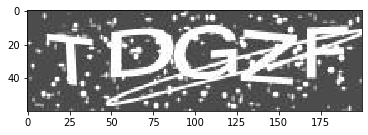

In [9]:
img_file = os.listdir('img')[0:1000][5]
dilation = pre_processing(img_file, k=4, f=1)
dilation.shape

In [6]:
os.listdir('img')[30:31]

['2ZTPD.png']

In [5]:
img

NameError: name 'img' is not defined